# INTRO

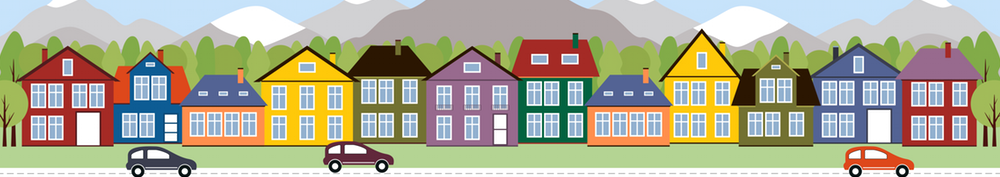

In [2]:
from IPython.display import Image
Image("housesbanner.png")

Ask a home buyer to describe their dream house, and they probably won't begin with the height of the basement ceiling or the proximity to an east-west railroad. But this playground competition's dataset proves that much more influences price negotiations than the number of bedrooms or a white-picket fence.

With 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa, this competition challenges you to predict the final price of each home.

Practice Skills
Creative feature engineering 
Advanced regression techniques like random forest and gradient boosting

## What you ll find here
In this notebook I will use several Feature engineering techniques to deal with:
    - Missing Values, Rare Labels, Outliers and Categorical Variables
Than, I will use different Feature Selection Techniques such as:
    - Removing constants and quasi-constants, correlated features, dupplicated features
    - Recursive feature selection based on XGB, GradientBoosting, RandomForest, and Single Linear Regression
Finally, I will create and train two models to predict the SalePrice for the competition:
    - XGBoost with GridSearch
    - ANN with Batchnormalization and ADAM optimizer

# Feature Engineering

In [3]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None, 'display.max_rows', 100)

In [4]:
# Import, Drop ID and Shape Check
df = pd.read_csv('house_price_challenge/train.csv')
y_train = df.iloc[:, -1]
X_train = df.iloc[:, :-1]
X_test = pd.read_csv('house_price_challenge/test.csv')
X_train.drop('Id', axis=1, inplace=True)
X_test.drop('Id', axis=1, inplace=True)
X_train.shape, X_test.shape, y_train.shape

((1460, 79), (1459, 79), (1460,))

In [5]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [6]:
X_test.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [7]:
# Check Value Types
print('DataTypes TrainSet')
print(X_train.dtypes.value_counts())
print()
print('DataTypes TestSet')
print(X_test.dtypes.value_counts())

DataTypes TrainSet
object     43
int64      33
float64     3
dtype: int64

DataTypes TestSet
object     43
int64      25
float64    11
dtype: int64


In [8]:
# Trimming columns with more than 90% missing values
features_90missing = []
for var in X_train.columns:
    if X_train[var].isnull().mean() > 0.9:
        features_90missing.append(var)
        X_train = X_train.drop(columns=var, axis=1)
        X_test = X_test.drop(columns=var, axis=1)

In [9]:
features_90missing

['Alley', 'PoolQC', 'MiscFeature']

In [10]:
# Creating lists for each dataype
categorical = [var for var in X_train.columns if X_train[var].dtype == 'O']
discrete = [var for var in X_train.columns if X_train[var].dtype != 'O' and X_train[var].nunique() < 20]
continuous = [var for var in X_train.columns if X_train[var].dtype != 'O' and var not in discrete and var != 'SalePrice']

print('Categorical variables are {}'.format(len(categorical)))
print(categorical)
print('')
print('Discrete variables are {}'.format(len(discrete)))
print(discrete)
print('')
print('Continuous variables are {}'.format(len(continuous)))
print(continuous)
print('')

Categorical variables are 40
['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition']

Discrete variables are 15
['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'PoolArea', 'MoSold', 'YrSold']

Continuous variables are 21
['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFi

In [11]:
# Check Shape
X_train.shape, X_test.shape

((1460, 76), (1459, 76))

## Missing Values

I will use different strategies for filling missing values for the different variable types. 

In [12]:
#Missing Values
from sklearn.impute import SimpleImputer
from sklearn.impute import MissingIndicator

#For the Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

Getting the features containing missing values into lists

In [13]:
# Check for missing values
missing_train = [var for var in X_train.columns if X_train[var].isnull().sum() > 0]
print('Variables containing missing values are {} :'.format(len(missing_train)))
print(missing_train)

Variables containing missing values are 16 :
['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence']


In [14]:
#Check how it looks like in the test set
missing_test = [var for var in X_test.columns if X_test[var].isnull().sum() > 0]
print('Variables containing missing values are {} :'.format(len(missing_test)))
print(missing_test)

Variables containing missing values are 30 :
['MSZoning', 'LotFrontage', 'Utilities', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'Fence', 'SaleType']


In [15]:
X_test[missing_test].isnull().mean().sort_values(ascending=False).head(16)

Fence           0.801234
FireplaceQu     0.500343
LotFrontage     0.155586
GarageCond      0.053461
GarageQual      0.053461
GarageFinish    0.053461
GarageYrBlt     0.053461
GarageType      0.052090
BsmtCond        0.030843
BsmtExposure    0.030158
BsmtQual        0.030158
BsmtFinType1    0.028787
BsmtFinType2    0.028787
MasVnrType      0.010966
MasVnrArea      0.010281
MSZoning        0.002742
dtype: float64

It looks like the features with greater amount of missing values have missing values in the test set as well. Thus, we will create missing indicators only for the features of the train set

In [16]:
# Create 1 List of Missing Indicators for each category - needed to impute labels on the right places
missing_cont = [var+'_ind' for var in X_train[continuous] if X_train[var].isnull().sum() > 0]
missing_disc = [var+'_ind' for var in X_train[discrete] if X_train[var].isnull().sum() > 0]
missing_cate = [var+'_ind' for var in X_train[categorical] if X_train[var].isnull().sum() > 0]

Lets build the Transformation Pipeline

In [17]:
# Building a pipline to handle missing values

continuous_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median', add_indicator=True)),
])

discrete_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', add_indicator=True)),
])

categorical_imputer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='Missing', add_indicator=True)),
])


preprocessor = ColumnTransformer(transformers=[
    ('continuous_imputer', continuous_imputer, continuous),
    ('discrete_imputer', discrete_imputer, discrete),
    ('categorical_imputer', categorical_imputer, categorical)
    
])

In [18]:
preprocessor.fit(X_train)
X_train = preprocessor.transform(X_train)
X_test = preprocessor.transform(X_test)

In [19]:
# Check Shape to ensure we add the label lists correctly
np.shape(X_train), np.shape(X_test)

((1460, 92), (1459, 92))

In [20]:
len(continuous+missing_cont+discrete+missing_disc+categorical+missing_cate)

92

In [21]:
#The transformation transform the DataFrame into a numpy array so we need to add the labels
#Furthermore, all values have been turned into strings, so we need to transform the initial numerical values back into numbers
X_train = pd.DataFrame(X_train, columns=continuous+missing_cont+discrete+missing_disc+categorical+missing_cate)
X_train = X_train.apply(pd.to_numeric, errors='ignore')
X_test = pd.DataFrame(X_test, columns=continuous+missing_cont+discrete+missing_disc+categorical+missing_cate)
X_test = X_test.apply(pd.to_numeric, errors='ignore')

In [22]:
#Lets check how it looks like now
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,LotFrontage_ind,MasVnrArea_ind,GarageYrBlt_ind,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,MasVnrType_ind,BsmtQual_ind,BsmtCond_ind,BsmtExposure_ind,BsmtFinType1_ind,BsmtFinType2_ind,Electrical_ind,FireplaceQu_ind,GarageType_ind,GarageFinish_ind,GarageQual_ind,GarageCond_ind,Fence_ind
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,2003.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,7,5,1,0,2,1,3,1,8,0,2,0,2,2008,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,Missing,Attchd,RFn,TA,TA,Y,Missing,WD,Normal,False,False,False,False,False,False,False,True,False,False,False,False,True
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,1976.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,20,6,8,0,1,2,0,3,1,6,1,2,0,5,2007,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,True
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,2001.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,7,5,1,0,2,1,3,1,6,1,2,0,9,2008,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,True
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1998.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0.0,0.0,0.0,70,7,5,1,0,1,0,3,1,7,1,3,0,2,2006,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,Missing,WD,Abnorml,False,False,False,False,False,False,False,False,False,False,False,False,True
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,2000.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60,8,5,1,0,2,1,4,1,9,1,3,0,12,2008,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,Missing,WD,Normal,False,False,False,False,False,False,False,False,False,False,False,False,True


In [23]:
# Check Value Types. The _ind Features are of type boolen
print('DataTypes TrainSet')
print(X_train.dtypes.value_counts())
print()
print('DataTypes TestSet')
print(X_test.dtypes.value_counts())

DataTypes TrainSet
object     40
float64    24
int64      15
bool       13
dtype: int64

DataTypes TestSet
object     40
float64    39
bool       13
dtype: int64


In [24]:
# We will need that later
missing_indicators = missing_cont+missing_disc+missing_cate
missing_indicators

['LotFrontage_ind',
 'MasVnrArea_ind',
 'GarageYrBlt_ind',
 'MasVnrType_ind',
 'BsmtQual_ind',
 'BsmtCond_ind',
 'BsmtExposure_ind',
 'BsmtFinType1_ind',
 'BsmtFinType2_ind',
 'Electrical_ind',
 'FireplaceQu_ind',
 'GarageType_ind',
 'GarageFinish_ind',
 'GarageQual_ind',
 'GarageCond_ind',
 'Fence_ind']

## Handling Rare Labels

All values of categorical features which are presented in less than 5% of the entries will be put in a 'Rare' category

In [25]:
# All values that appears over a certain treshold + the Missing values will be consider non-rare
def find_non_rare_labels(df, variable, tolerance):
    temp = df.groupby([variable])[variable].count() / len(df)
    non_rare = [x for x in temp.loc[temp>tolerance].index.values] + ['Missing']
    return non_rare

In [26]:
# Assiging category Rare to the rare values
def rare_encoding(X_train, X_test, variable, tolerance):

    X_train = X_train.copy()
    X_test = X_test.copy()

    # find the most frequent category
    frequent_cat = find_non_rare_labels(X_train, variable, tolerance)

    # re-group rare labels
    X_train[variable] = np.where(X_train[variable].isin(
        frequent_cat), X_train[variable], 'Rare')
    
    X_test[variable] = np.where(X_test[variable].isin(
        frequent_cat), X_test[variable], 'Rare')

    return X_train, X_test

In [27]:
# Transforming
for variable in categorical:
    X_train, X_test = rare_encoding(X_train, X_test, variable, 0.05)

In [28]:
#Print categories in each feature to check the Rare labels
for var in categorical:
    print(X_train.groupby(var)[var].count() / len(X_train))
    print()

MSZoning
RL      0.788356
RM      0.149315
Rare    0.062329
Name: MSZoning, dtype: float64

Street
Pave    0.99589
Rare    0.00411
Name: Street, dtype: float64

LotShape
IR1     0.331507
Rare    0.034932
Reg     0.633562
Name: LotShape, dtype: float64

LandContour
Lvl     0.897945
Rare    0.102055
Name: LandContour, dtype: float64

Utilities
AllPub    0.999315
Rare      0.000685
Name: Utilities, dtype: float64

LotConfig
Corner     0.180137
CulDSac    0.064384
Inside     0.720548
Rare       0.034932
Name: LotConfig, dtype: float64

LandSlope
Gtl     0.946575
Rare    0.053425
Name: LandSlope, dtype: float64

Neighborhood
CollgCr    0.102740
Edwards    0.068493
Gilbert    0.054110
NAmes      0.154110
NridgHt    0.052740
OldTown    0.077397
Rare       0.380822
Sawyer     0.050685
Somerst    0.058904
Name: Neighborhood, dtype: float64

Condition1
Feedr    0.055479
Norm     0.863014
Rare     0.081507
Name: Condition1, dtype: float64

Condition2
Norm    0.989726
Rare    0.010274
Name: Condit

## Categorical Values

In order to possibly improve the model, I will transform the categorical variables into numbers considering their relationtip to the dependent variable. 

In [29]:
# Covert Strings to numbers
def find_categorical_mappings(df, var, target):
    #generating an ordered list
    ordered_labels=pd.concat((df, y_train), axis=1).groupby([var])[target].mean().sort_values().index
    
    #return the dictionary with mappings
    return {k: i for i, k in enumerate(ordered_labels, 0)}

In [30]:
def integer_encode(train, test, var, ordinal_mapping):
    train[var] = train[var].map(ordinal_mapping)
    test[var] = test[var].map(ordinal_mapping)

In [31]:
#I will transform the categorical features as well as the boolen Missing Indicators
for var in missing_indicators+categorical:
    mappings = find_categorical_mappings(X_train, var, 'SalePrice')
    integer_encode(X_train, X_test, var, mappings)

In [32]:
#Lets check how the dataset looks like now
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,LotFrontage_ind,MasVnrArea_ind,GarageYrBlt_ind,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,MasVnrType_ind,BsmtQual_ind,BsmtCond_ind,BsmtExposure_ind,BsmtFinType1_ind,BsmtFinType2_ind,Electrical_ind,FireplaceQu_ind,GarageType_ind,GarageFinish_ind,GarageQual_ind,GarageCond_ind,Fence_ind
0,65.0,8450.0,2003.0,2003.0,196.0,706.0,0.0,150.0,856.0,856.0,854.0,0.0,1710.0,2003.0,548.0,0.0,61.0,0.0,0.0,0.0,0.0,0,0,1,60,7,5,1,0,2,1,3,1,8,0,2,0,2,2008,2,1,0,0,1,0,0,6,2,1,2,3,0,0,5,5,2,1,2,3,3,2,1,6,2,1,3,1,3,2,1,0,3,2,2,2,2,2,1,2,0,1,1,1,1,1,1,0,1,1,1,1,1
1,80.0,9600.0,1976.0,1976.0,0.0,978.0,0.0,284.0,1262.0,1262.0,0.0,0.0,1262.0,1976.0,460.0,298.0,0.0,0.0,0.0,0.0,0.0,0,0,1,20,6,8,0,1,2,0,3,1,6,1,2,0,5,2007,2,1,0,0,1,1,0,4,0,1,2,2,0,0,0,1,1,0,2,2,3,2,4,4,2,1,3,1,3,1,1,1,3,2,2,2,2,2,1,2,0,1,1,1,1,1,1,1,1,1,1,1,1
2,68.0,11250.0,2001.0,2002.0,162.0,486.0,0.0,434.0,920.0,920.0,866.0,0.0,1786.0,2001.0,608.0,0.0,42.0,0.0,0.0,0.0,0.0,0,0,1,60,7,5,1,0,2,1,3,1,6,1,2,0,9,2008,2,1,1,0,1,0,0,6,2,1,2,3,0,0,5,5,2,1,2,3,3,2,2,6,2,1,3,1,3,2,1,1,3,2,2,2,2,2,1,2,0,1,1,1,1,1,1,1,1,1,1,1,1
3,60.0,9550.0,1915.0,1970.0,0.0,216.0,0.0,540.0,756.0,961.0,756.0,0.0,1717.0,1998.0,642.0,0.0,35.0,272.0,0.0,0.0,0.0,0,0,1,70,7,5,1,0,1,0,3,1,7,1,3,0,2,2006,2,1,1,0,1,2,0,4,2,1,2,3,0,0,1,4,1,0,2,1,2,1,1,4,2,1,2,1,3,2,1,3,1,1,2,2,2,2,1,0,0,1,1,1,1,1,1,1,1,1,1,1,1
4,84.0,14260.0,2000.0,2000.0,350.0,655.0,0.0,490.0,1145.0,1145.0,1053.0,0.0,2198.0,2000.0,836.0,192.0,84.0,0.0,0.0,0.0,0.0,0,0,1,60,8,5,1,0,2,1,4,1,9,1,3,0,12,2008,2,1,1,0,1,1,0,4,2,1,2,3,0,0,5,5,2,1,2,3,3,2,3,6,2,1,3,1,3,2,1,1,3,2,2,2,2,2,1,2,0,1,1,1,1,1,1,1,1,1,1,1,1


In [33]:
#Lets check how the dataset looks like now
X_test.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal,LotFrontage_ind,MasVnrArea_ind,GarageYrBlt_ind,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,PoolArea,MoSold,YrSold,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,MasVnrType_ind,BsmtQual_ind,BsmtCond_ind,BsmtExposure_ind,BsmtFinType1_ind,BsmtFinType2_ind,Electrical_ind,FireplaceQu_ind,GarageType_ind,GarageFinish_ind,GarageQual_ind,GarageCond_ind,Fence_ind
0,80.0,11622.0,1961.0,1961.0,0.0,468.0,144.0,270.0,882.0,896.0,0.0,0.0,896.0,1961.0,730.0,140.0,0.0,0.0,0.0,120.0,0.0,0,0,1,20.0,5.0,6.0,0.0,0.0,1.0,0.0,2.0,1.0,5.0,0.0,1.0,0.0,6.0,2010.0,1.0,1,0,0,1.0,0,0,3,0,1,2,2,0,0,5.0,5.0,1,0,2,2,2,2,1,1,1,1,1,1,3,1.0,1.0,0,3,1,2,2,2,0,1.0,2,0,1,1,1,1,1,1,0,1,1,1,1,0
1,81.0,14267.0,1958.0,1958.0,108.0,923.0,0.0,406.0,1329.0,1329.0,0.0,0.0,1329.0,1958.0,312.0,393.0,36.0,0.0,0.0,0.0,12500.0,0,0,1,20.0,6.0,6.0,0.0,0.0,1.0,1.0,3.0,1.0,6.0,0.0,1.0,0.0,6.0,2010.0,2.0,1,1,0,1.0,2,0,3,2,1,2,2,2,0,1.0,0.0,2,0,2,2,2,2,1,4,2,1,1,1,3,2.0,1.0,0,3,1,2,2,2,2,1.0,2,0,1,1,1,1,1,1,0,1,1,1,1,1
2,74.0,13830.0,1997.0,1998.0,0.0,791.0,0.0,137.0,928.0,928.0,701.0,0.0,1629.0,1997.0,482.0,212.0,34.0,0.0,0.0,0.0,0.0,0,0,1,60.0,5.0,5.0,0.0,0.0,2.0,1.0,3.0,1.0,6.0,1.0,2.0,0.0,3.0,2010.0,2.0,1,1,0,1.0,0,0,5,2,1,2,3,0,0,5.0,5.0,1,0,2,3,3,2,1,6,2,1,2,1,3,1.0,1.0,1,3,3,2,2,2,0,1.0,2,0,1,1,1,1,1,1,1,1,1,1,1,0
3,78.0,9978.0,1998.0,1998.0,20.0,602.0,0.0,324.0,926.0,926.0,678.0,0.0,1604.0,1998.0,470.0,360.0,36.0,0.0,0.0,0.0,0.0,0,0,1,60.0,6.0,6.0,0.0,0.0,2.0,1.0,3.0,1.0,7.0,1.0,2.0,0.0,6.0,2010.0,2.0,1,1,0,1.0,0,0,5,2,1,2,3,0,0,5.0,5.0,2,0,2,3,2,2,1,6,2,1,3,1,3,2.0,1.0,3,3,3,2,2,2,2,1.0,2,0,1,1,1,1,1,1,1,1,1,1,1,1
4,43.0,5005.0,1992.0,1992.0,0.0,263.0,0.0,1017.0,1280.0,1280.0,0.0,0.0,1280.0,1992.0,506.0,0.0,82.0,0.0,0.0,144.0,0.0,0,0,1,120.0,8.0,5.0,0.0,0.0,2.0,0.0,2.0,1.0,5.0,0.0,2.0,0.0,1.0,2010.0,2.0,1,1,1,1.0,0,0,4,2,1,1,2,0,0,2.0,2.0,1,1,2,3,3,2,1,4,2,1,3,1,3,2.0,1.0,0,3,2,2,2,2,2,1.0,2,0,1,1,1,1,1,1,0,1,1,1,1,1


In [34]:
# Check Value Types. The _ind Features are of type boolen
print('DataTypes TrainSet')
print(X_train.dtypes.value_counts())
print()
print('DataTypes TestSet')
print(X_test.dtypes.value_counts())

DataTypes TrainSet
int64      71
float64    21
dtype: int64

DataTypes TestSet
int64      49
float64    43
dtype: int64


In [35]:
X_test.isnull().mean().sort_values(ascending=False).head(10)

MSZoning        0.002742
Utilities       0.001371
Functional      0.001371
KitchenQual     0.000685
Exterior1st     0.000685
Exterior2nd     0.000685
SaleType        0.000685
BedroomAbvGr    0.000000
MSSubClass      0.000000
OverallQual     0.000000
dtype: float64

There are still missing values in the Test Set. But they are very, very few. So, we want bother

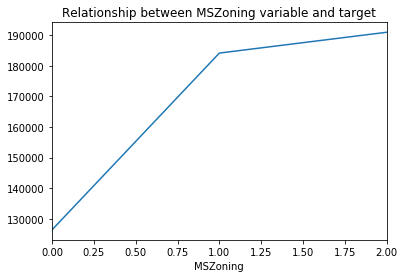

1


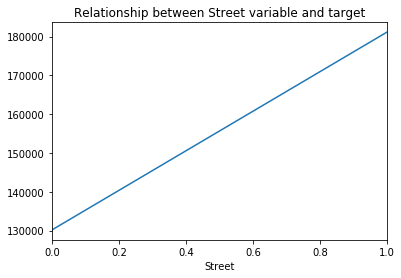

2


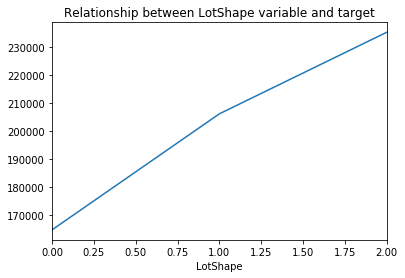

3


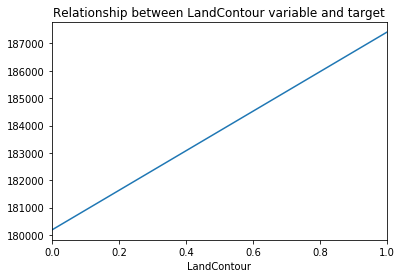

4


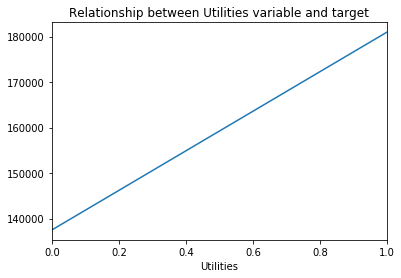

5


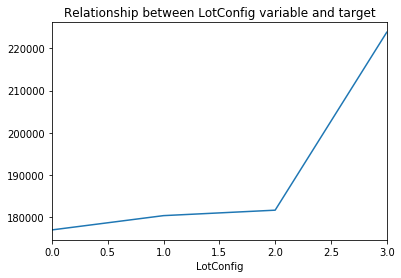

6


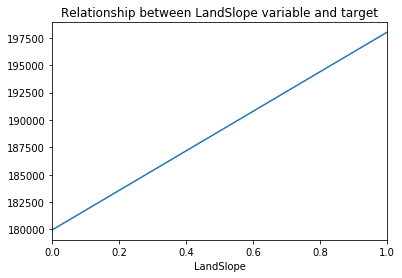

7


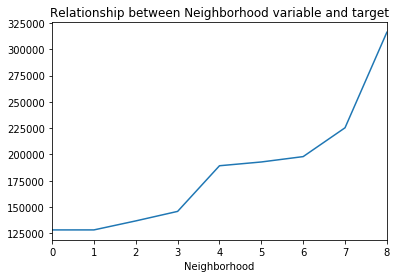

8


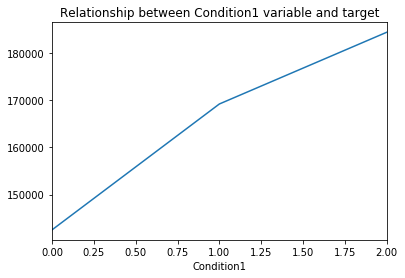

9


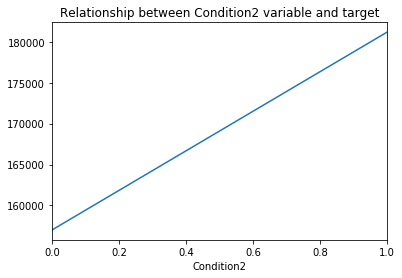

10


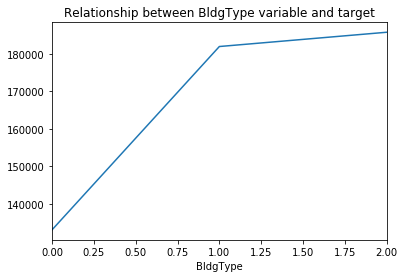

11


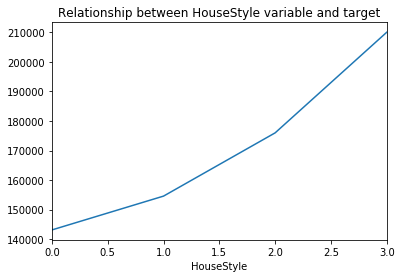

12


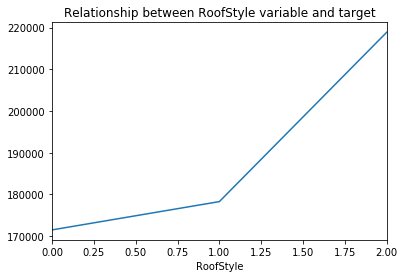

13


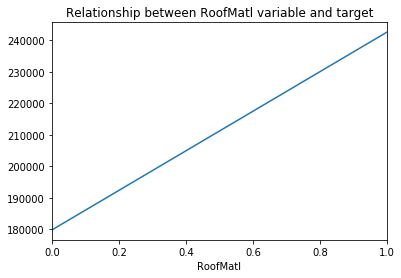

14


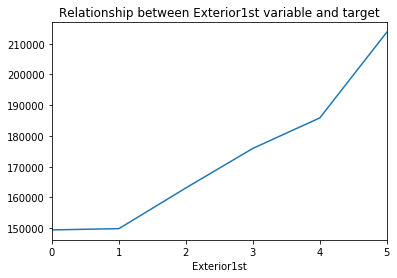

15


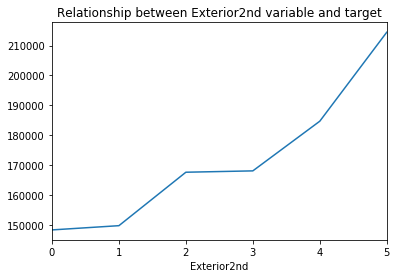

16


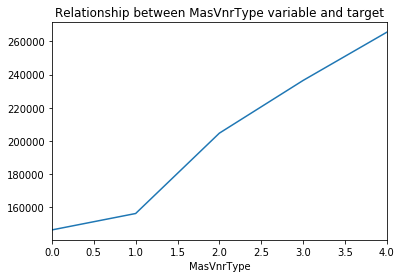

17


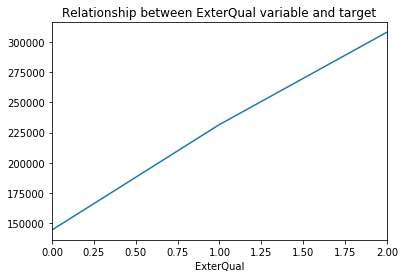

18


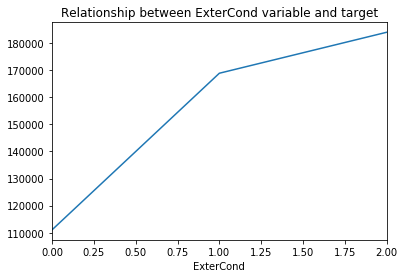

19


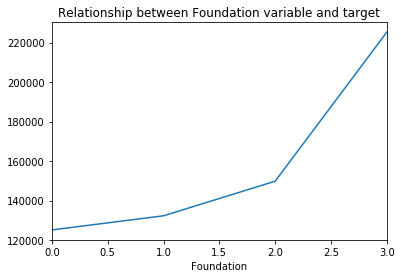

20


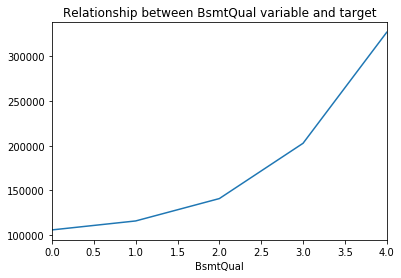

21


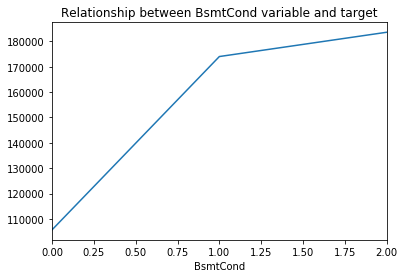

22


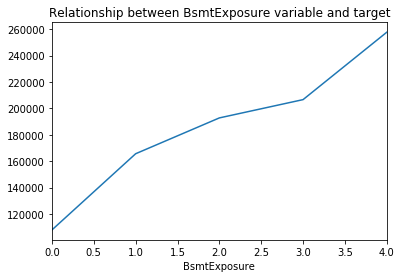

23


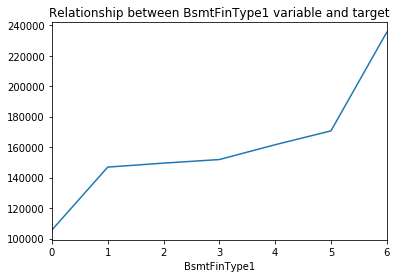

24


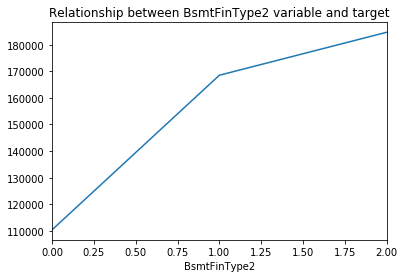

25


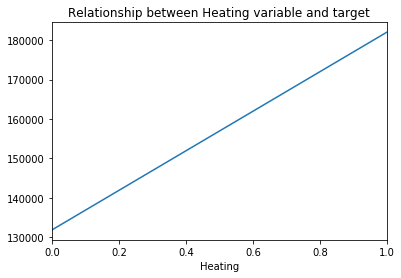

26


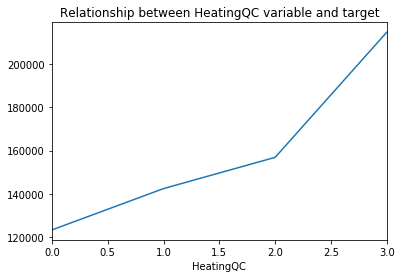

27


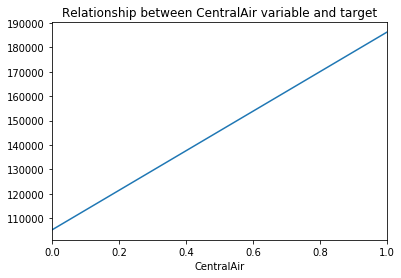

28


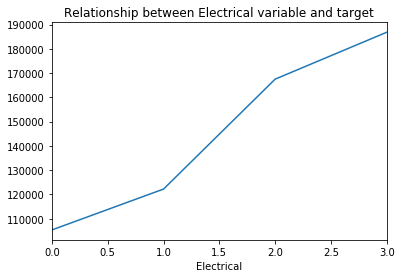

29


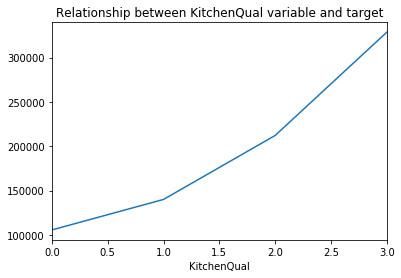

30


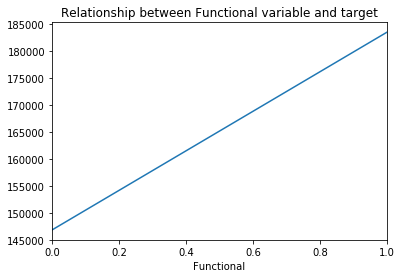

31


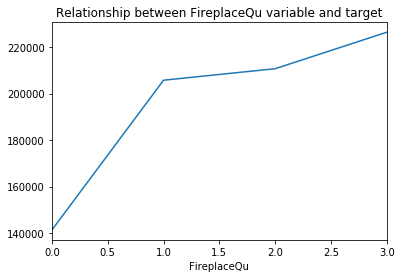

32


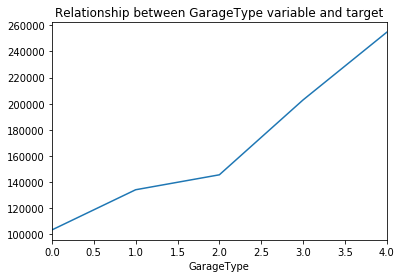

33


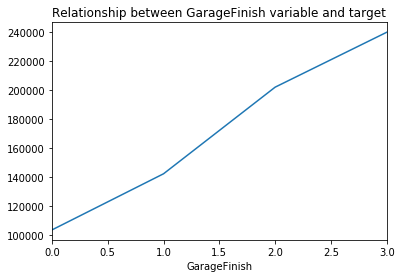

34


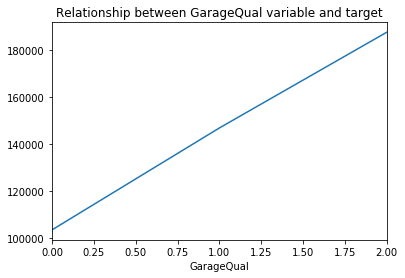

35


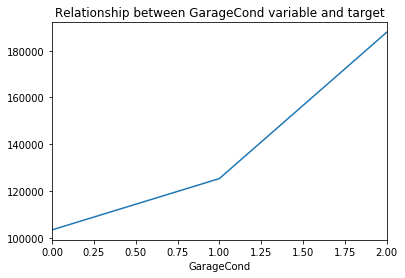

36


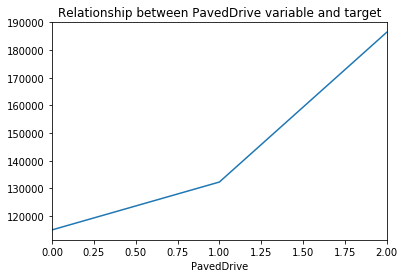

37


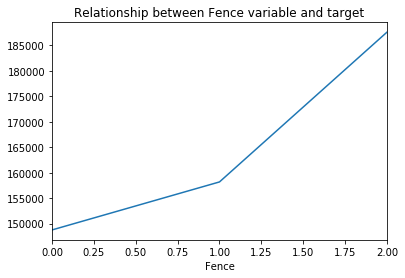

38


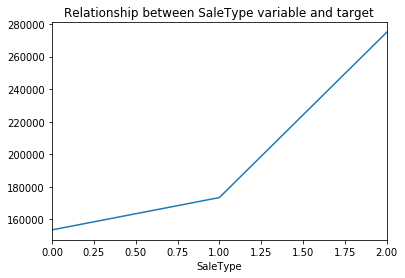

39


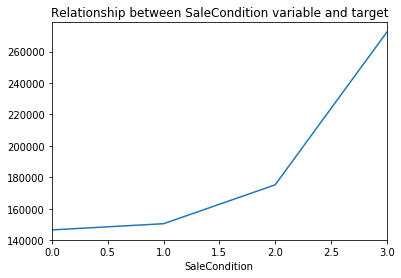

40


In [37]:
# Explore the realtionship between categorical variabels and the target
i = 0
for var in categorical:
    i = i + 1
    fig = plt.figure()
    fig = pd.concat((X_train, y_train), axis=1).groupby([var])['SalePrice'].mean().plot()
    fig.set_title('Relationship between {} variable and target'.format(var))
    fig.set_ylabel = ('Mean SalePrice')
    plt.show()
    print(i)
    
    

In [38]:
# Create a copy in case we want to compare result later
X_train_mv = X_train.copy()
X_test_mv = X_test.copy()

## Transforming time Variables

We will transform the time variables in order to extract more important information out of them

In [39]:
time_variables = [var for var in df.columns if 'Yr' in var or 'Year' in var]
time_variables

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [40]:
# Transforming the time variables:
def transform_time(df, var):
    if var != 'YrSold':
        df[var] = df['YrSold'] - df[var]
    return df

In [41]:
for var in time_variables:
    X_train = transform_time(X_train, var)
    X_test = transform_time(X_test, var)

In [42]:
#Lets take a look how that looks like
X_train[time_variables].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5.0,5.0,5.0,2008
1,31.0,31.0,31.0,2007
2,7.0,6.0,7.0,2008
3,91.0,36.0,8.0,2006
4,8.0,8.0,8.0,2008


In [43]:
# Create a copy in case we want to compare result later
X_train_time = X_train.copy()
X_test_time = X_test.copy()

## Dealing with outliers
The most of the continuous variables were not normally distributed. Thus, I will treat as Outliers values outside certain quantiles.

In [45]:
def find_skewed_boundaries(df, variable, distance):

    # Let's calculate the boundaries outside which sit the outliers
    # for skewed distributions

    # distance passed as an argument, gives us the option to
    # estimate 1.5 times or 3 times the IQR to calculate
    # the boundaries.

    IQR = df[variable].quantile(0.75) - df[variable].quantile(0.25)

    lower_boundary = df[variable].quantile(0.25) - (IQR * distance)
    upper_boundary = df[variable].quantile(0.75) + (IQR * distance)

    return upper_boundary, lower_boundary

In [46]:
#My function
for var in X_train[continuous]:
    # define figure size
    print('For feature: ' + str(var))
    print('total: {}'.format(len(X_train)))  
    
    upper_boundary, lower_boundary = find_skewed_boundaries(X_train, var, 1.5)
    print('over the upper bound: {}'.format(
        round(len(X_train[X_train[var] > upper_boundary])/len(X_train), 2)))
    print('under the lower bound: {}'.format(
        round(len(X_train[X_train[var] < lower_boundary])/len(X_train), 2)))
    print()
    
    X_train[var]= np.where(X_train[var] > upper_boundary, upper_boundary,
                        np.where(X_train[var] < lower_boundary, lower_boundary, X_train[var]))
   
    X_test[var]= np.where(X_test[var] > upper_boundary, upper_boundary,
                        np.where(X_test[var] < lower_boundary, lower_boundary, X_test[var]))   
    

For feature: LotFrontage
total: 1460
over the upper bound: 0.04
under the lower bound: 0.03

For feature: LotArea
total: 1460
over the upper bound: 0.05
under the lower bound: 0.0

For feature: YearBuilt
total: 1460
over the upper bound: 0.01
under the lower bound: 0.0

For feature: YearRemodAdd
total: 1460
over the upper bound: 0.0
under the lower bound: 0.0

For feature: MasVnrArea
total: 1460
over the upper bound: 0.07
under the lower bound: 0.0

For feature: BsmtFinSF1
total: 1460
over the upper bound: 0.0
under the lower bound: 0.0

For feature: BsmtFinSF2
total: 1460
over the upper bound: 0.11
under the lower bound: 0.0

For feature: BsmtUnfSF
total: 1460
over the upper bound: 0.02
under the lower bound: 0.0

For feature: TotalBsmtSF
total: 1460
over the upper bound: 0.02
under the lower bound: 0.03

For feature: 1stFlrSF
total: 1460
over the upper bound: 0.01
under the lower bound: 0.0

For feature: 2ndFlrSF
total: 1460
over the upper bound: 0.0
under the lower bound: 0.0

For f

In [47]:
X_train_outliers = X_train.copy()
X_test_outliers = X_test.copy()

## Trying with discretizer

This would be another way to deal with outliers. I wont use it though

In [351]:
# X_train_discret = X_train_time.copy()

In [352]:
# X_test_discret = X_test_time.copy()

In [353]:
# from sklearn.preprocessing import KBinsDiscretizer

In [354]:
# continuous_no_ID = [var for var in df[continuous] if var != 'Id']
# continuous_no_ID

In [355]:
# disc = KBinsDiscretizer(n_bins=15, encode='ordinal', strategy='uniform')

# disc.fit(X_train_discret[continuous_no_ID])

In [356]:
# X_train_discret[continuous_no_ID] = disc.transform(X_train_discret[continuous_no_ID])
# X_test_discret[continuous_no_ID] = disc.transform(X_test_discret[continuous_no_ID])

In [357]:
# for var in continuous_no_ID:
#     print(X_train_discret[var].value_counts())
#     print()

In [358]:
# X_test_discret

# Feature Selection

In [48]:
# Check where we are now
X_train.shape, X_test.shape

((1460, 92), (1459, 92))

## Quasi-Constant Features

I will delete features for which 97% or more of the entries shows the same value

In [49]:
# Removing quasi constant features (where 97% of the entries have the same value):
quasi_constants = []
for var in X_train.columns:
    tem = X_train[var].value_counts()/X_train.shape[0]
    if tem.iloc[0] >= 0.98:
        quasi_constants.append(var)
len(quasi_constants)

14

In [50]:
X_train.drop(columns=quasi_constants, inplace=True)
X_test.drop(columns=quasi_constants, inplace=True)
X_test.shape, X_train.shape

((1459, 78), (1460, 78))

## Duplicated Features

In [51]:
# Check for dupplicate rows after transposing the columns
X_train_t = X_train.T
X_train_t.duplicated().sum()

6

In [52]:
features_to_drop = X_train_t[X_train_t.duplicated()].index
features_to_drop

Index(['BsmtCond_ind', 'BsmtFinType1_ind', 'GarageType_ind',
       'GarageFinish_ind', 'GarageQual_ind', 'GarageCond_ind'],
      dtype='object')

In [53]:
#removing dupplicated features
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)

In [54]:
X_test.shape, X_train.shape

((1459, 72), (1460, 72))

In [55]:
X_train_ND = X_train.copy()
X_test_ND = X_test.copy()

In [56]:
X_train.head()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,LotFrontage_ind,GarageYrBlt_ind,MSSubClass,OverallQual,OverallCond,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,MoSold,YrSold,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,BldgType,HouseStyle,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,Fence,SaleType,SaleCondition,BsmtQual_ind,BsmtExposure_ind,BsmtFinType2_ind,FireplaceQu_ind,Fence_ind
0,65.0,8450.0,5.0,5.0,196.0,706.0,150.0,856.0,856.0,854.0,1710.0,5.0,548.0,0.0,61.0,0,1,60,7,5,1,0,2,1,3,1,8,0,2,2,2008,2,0,0,0,0,6,2,2,3,0,5,5,2,1,2,3,3,2,1,6,2,1,3,1,3,2,1,0,3,2,2,2,2,2,1,2,1,1,1,0,1
1,80.0,9600.0,31.0,31.0,0.0,978.0,284.0,1262.0,1262.0,0.0,1262.0,31.0,460.0,298.0,0.0,0,1,20,6,8,0,1,2,0,3,1,6,1,2,5,2007,2,0,0,1,0,4,0,2,2,0,0,1,1,0,2,2,3,2,4,4,2,1,3,1,3,1,1,1,3,2,2,2,2,2,1,2,1,1,1,1,1
2,68.0,11250.0,7.0,6.0,162.0,486.0,434.0,920.0,920.0,866.0,1786.0,7.0,608.0,0.0,42.0,0,1,60,7,5,1,0,2,1,3,1,6,1,2,9,2008,2,1,0,0,0,6,2,2,3,0,5,5,2,1,2,3,3,2,2,6,2,1,3,1,3,2,1,1,3,2,2,2,2,2,1,2,1,1,1,1,1
3,60.0,9550.0,91.0,36.0,0.0,216.0,540.0,756.0,961.0,756.0,1717.0,8.0,642.0,0.0,35.0,0,1,70,7,5,1,0,1,0,3,1,7,1,3,2,2006,2,1,0,2,0,4,2,2,3,0,1,4,1,0,2,1,2,1,1,4,2,1,2,1,3,2,1,3,1,1,2,2,2,2,1,0,1,1,1,1,1
4,84.0,14260.0,8.0,8.0,350.0,655.0,490.0,1145.0,1145.0,1053.0,2198.0,8.0,836.0,192.0,84.0,0,1,60,8,5,1,0,2,1,4,1,9,1,3,12,2008,2,1,0,1,0,4,2,2,3,0,5,5,2,1,2,3,3,2,3,6,2,1,3,1,3,2,1,1,3,2,2,2,2,2,1,2,1,1,1,1,1


## Correlated Features
I will delete correlated features showing 90% or higher correlation. I would like to shrink the feature space, to reduce the chance of overfitting.

In [57]:
# Checking for correlated features
corrmat = X_train.corr()
corrmat = corrmat.abs().unstack().sort_values(ascending=False)
corrmat = corrmat[corrmat >= 0.9] 
corrmat = corrmat[corrmat < 1]
corrmat = pd.DataFrame(corrmat).reset_index()
corrmat.columns = ['feature1', 'feature2', 'corr']
corrmat

,feature1,feature2,corr
0,BsmtExposure_ind,BsmtQual_ind,0.986408
1,BsmtQual_ind,BsmtExposure_ind,0.986408
2,BsmtFinType2_ind,BsmtQual_ind,0.986408
3,BsmtQual_ind,BsmtFinType2_ind,0.986408
4,BsmtFinType2_ind,BsmtExposure_ind,0.972981
5,BsmtExposure_ind,BsmtFinType2_ind,0.972981
6,Fence_ind,Fence,0.942531
7,Fence,Fence_ind,0.942531
8,GarageCond,GarageYrBlt_ind,0.923269
9,GarageYrBlt_ind,GarageCond,0.923269


In [58]:
# find and remove correlated features
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.90)
print('correlated features: ', len(set(corr_features)) )
print(corr_features)

correlated features:  6
{'FireplaceQu_ind', 'Fence_ind', 'GarageCond', 'BsmtFinType2_ind', 'GarageQual', 'BsmtExposure_ind'}


In [59]:
X_train.drop(labels=corr_features, axis=1, inplace=True)
X_test.drop(labels=corr_features, axis=1, inplace=True)
X_train.shape, X_test.shape

((1460, 66), (1459, 66))

In [60]:
# Create a copy in case we want to test with the result sofar
X_train_NCor = X_train.copy()
X_test_NCor = X_test.copy()

## Statistical Measures

We could build a regression between each variable and the dependent variable and select only features that shows some kind of a linear relationship with the target. I will skip this though

In [62]:
# from sklearn.feature_selection import mutual_info_regression
# from sklearn.feature_selection import SelectKBest, SelectPercentile


# mi = mutual_info_regression(X_train, y_train)
# mi = pd.Series(mi)
# mi.index = X_train.columns
# mi.sort_values(ascending=False)

OverallQual        0.547183
GrLivArea          0.479462
TotalBsmtSF        0.370023
GarageArea         0.366550
GarageCars         0.365725
YearBuilt          0.340435
BsmtQual           0.328473
KitchenQual        0.326056
Neighborhood       0.321491
1stFlrSF           0.312390
ExterQual          0.311553
MSSubClass         0.270402
GarageFinish       0.269317
YearRemodAdd       0.267813
FullBath           0.264731
GarageYrBlt        0.255730
TotRmsAbvGrd       0.209889
Foundation         0.202807
2ndFlrSF           0.201140
GarageType         0.197642
LotFrontage        0.195418
FireplaceQu        0.187388
LotArea            0.180231
Fireplaces         0.168361
BsmtFinType1       0.165110
HeatingQC          0.164160
BsmtFinSF1         0.159874
Exterior2nd        0.149598
Exterior1st        0.146624
OpenPorchSF        0.136809
BsmtUnfSF          0.116313
WoodDeckSF         0.115418
MSZoning           0.112238
OverallCond        0.111335
SaleType           0.105213
MasVnrType         0

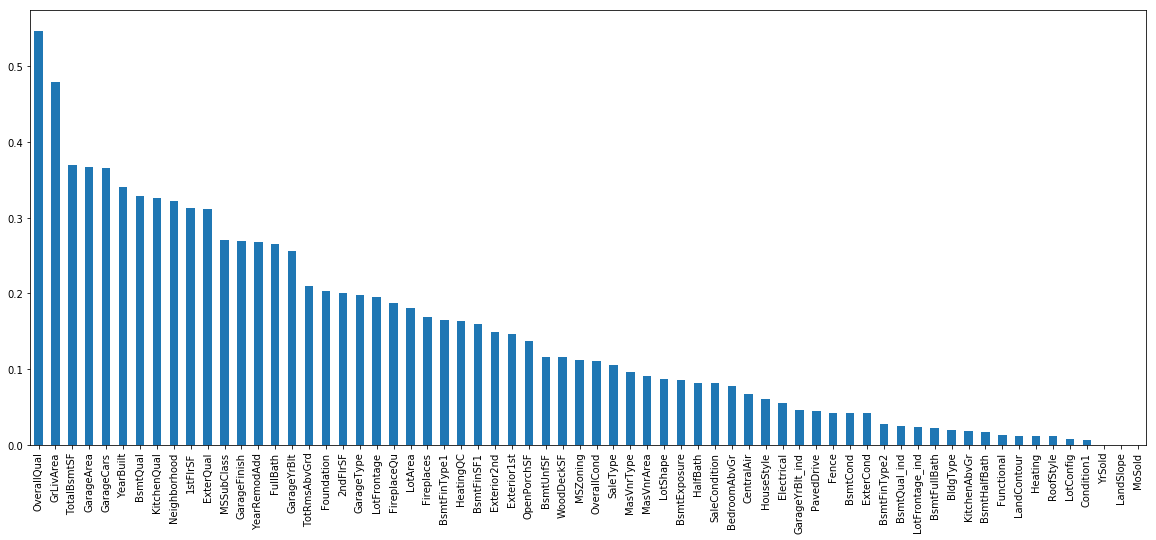

In [63]:
# mi.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [64]:
# # Selecting some part of the set
# sel_ = SelectPercentile(mutual_info_regression, percentile=90).fit(X_train, y_train)
# X_train.columns[sel_.get_support()]

Index(['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'LotFrontage_ind', 'GarageYrBlt_ind', 'MSSubClass', 'OverallQual',
       'OverallCond', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MSZoning', 'LotShape',
       'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType', 'HouseStyle',
       'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition',
       'BsmtQual_ind'],
      dtype='object')

In [375]:
# X_train_IG = X_train[X_train.columns[sel_.get_support()]]
# X_test_IG = X_test[X_train.columns[sel_.get_support()]]

In [376]:
# X_train_IG.shape, X_test_IG.shape

## Embaded Filtering based on Random Forest

### Random Forest

This would be another way of selecting only predictive features. I will use a Hybrid Rcursive Gradient Boosting though

In [65]:
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import RandomForestRegressor

In [66]:
# sel_ = SelectFromModel(RandomForestRegressor(n_estimators=50), threshold="0.1*mean")
# sel_.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor(bootstrap=True, criterion='mse',
                                                max_depth=None,
                                                max_features='auto',
                                                max_leaf_nodes=None,
                                                min_impurity_decrease=0.0,
                                                min_impurity_split=None,
                                                min_samples_leaf=1,
                                                min_samples_split=2,
                                                min_weight_fraction_leaf=0.0,
                                                n_estimators=50, n_jobs=None,
                                                oob_score=False,
                                                random_state=None, verbose=0,
                                                warm_start=False),
                max_features=None, norm_order=1, prefit=False,
   

In [67]:
# selected_feat = X_train.columns[(sel_.get_support())]
# len(selected_feat)

39

In [308]:
# X_train = X_train[selected_feat]
# X_test = X_test[selected_feat]
# X_train.shape, X_test.shape

((1460, 37), (1459, 37))

### Gradient Boosting

This would be another way of selecting only predictive features. I will use a Hybrid Rcursive Gradient Boosting though

In [68]:
# from sklearn.ensemble import GradientBoostingRegressor

In [70]:
# sel_ = SelectFromModel(GradientBoostingRegressor(), threshold="0.02*mean")
# sel_.fit(X_train, y_train)

SelectFromModel(estimator=GradientBoostingRegressor(alpha=0.9,
                                                    criterion='friedman_mse',
                                                    init=None,
                                                    learning_rate=0.1,
                                                    loss='ls', max_depth=3,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100,
                                                    

In [71]:
# selected_feat = X_train.columns[(sel_.get_support())]
# len(selected_feat)

37

In [478]:
# X_train_IGa_GB = X_train_IG[selected_feat]
# X_test_IGa_GB = X_test_IG[selected_feat]
# X_train_IGa_GB.shape, X_test_IGa_GB.shape

((1168, 38), (292, 38))

### Hybrid_Recursive_feature_elimination

In [72]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

In [73]:
# Splitting in train and dev in order to derive the most important features individually
X_train_tmp, X_dev_tmp, y_train_tmp, y_dev_tmp = train_test_split(X_train, y_train, test_size = 0.2, random_state = 0)

# set the seed for reproducibility
seed_val = 1000000000
np.random.seed(seed_val)

# build initial model using all the features
model_all_features = xgb.XGBRegressor(n_jobs=-1)

model_all_features.fit(X_train_tmp, y_train_tmp)

# calculate the R2 in the test set
y_pred_test = model_all_features.predict(X_dev_tmp)
r2_score_all = r2_score(y_dev_tmp, y_pred_test)
print('Test all features xgb R2 = %f' % (r2_score_all))

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:12:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Test all features xgb R2 = 0.863858


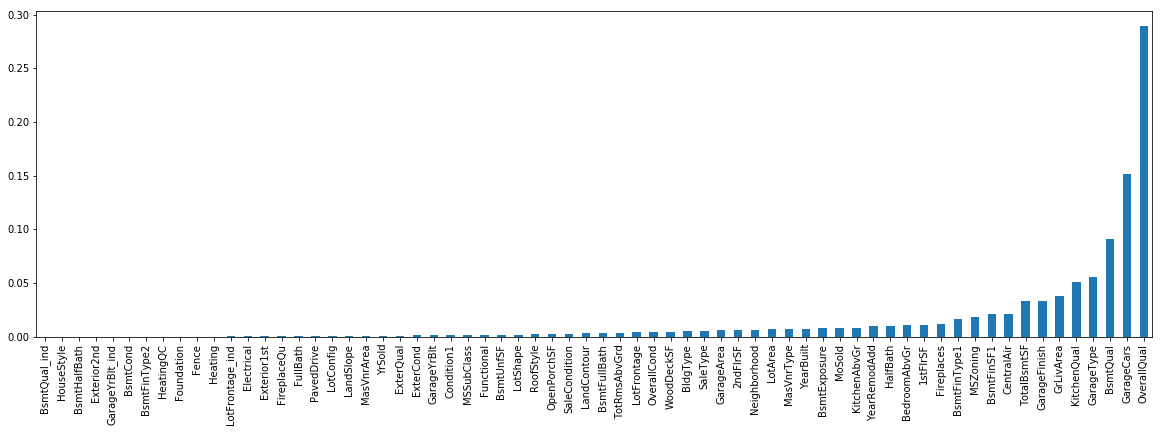

In [74]:
# the second step consist of deriving the importance of 
# each feature and ranking them from the least to the most
# important

# get feature name and importance
features = pd.Series(model_all_features.feature_importances_)
features.index = X_train.columns

# sort the features by importance
features.sort_values(ascending=True, inplace=True)

# plot
features.plot.bar(figsize=(20,6))

In [75]:
# view the list of ordered features -> This is the order in which I am going to remove a feature recursivelly
features = list(features.index)
features

['BsmtQual_ind',
 'HouseStyle',
 'BsmtHalfBath',
 'Exterior2nd',
 'GarageYrBlt_ind',
 'BsmtCond',
 'BsmtFinType2',
 'HeatingQC',
 'Foundation',
 'Fence',
 'Heating',
 'LotFrontage_ind',
 'Electrical',
 'Exterior1st',
 'FireplaceQu',
 'FullBath',
 'PavedDrive',
 'LotConfig',
 'LandSlope',
 'MasVnrArea',
 'YrSold',
 'ExterQual',
 'ExterCond',
 'GarageYrBlt',
 'Condition1',
 'MSSubClass',
 'Functional',
 'BsmtUnfSF',
 'LotShape',
 'RoofStyle',
 'OpenPorchSF',
 'SaleCondition',
 'LandContour',
 'BsmtFullBath',
 'TotRmsAbvGrd',
 'LotFrontage',
 'OverallCond',
 'WoodDeckSF',
 'BldgType',
 'SaleType',
 'GarageArea',
 '2ndFlrSF',
 'Neighborhood',
 'LotArea',
 'MasVnrType',
 'YearBuilt',
 'BsmtExposure',
 'MoSold',
 'KitchenAbvGr',
 'YearRemodAdd',
 'HalfBath',
 'BedroomAbvGr',
 '1stFlrSF',
 'Fireplaces',
 'BsmtFinType1',
 'MSZoning',
 'BsmtFinSF1',
 'CentralAir',
 'TotalBsmtSF',
 'GarageFinish',
 'GrLivArea',
 'KitchenQual',
 'GarageType',
 'BsmtQual',
 'GarageCars',
 'OverallQual']

In [76]:
# recursive feature elimination:

# first we arbitrarily set the drop in r2
# if the drop is below this threshold,
# the feature will be removed
tol = 0.001

print('doing recursive feature elimination')

# we initialise a list where we will collect the
# features we should remove
features_to_remove = []

# set a counter to know how far ahead the loop is going
count = 1

# now we loop over all the features, in order of importance:
# remember that features is the list of ordered features
# by importance
for feature in features:
    print()
    print('testing feature: ', feature, ' which is feature ', count,
          ' out of ', len(features))
    count = count + 1

    # initialise model
    model_int = xgb.XGBRegressor(n_jobs=-1)

    # fit model with all variables minus the removed features
    # and the feature to be evaluated
    model_int.fit(
        X_train_tmp.drop(features_to_remove + [feature], axis=1), y_train_tmp)

    # make a prediction over the test set
    y_pred_dev = model_int.predict(
        X_dev_tmp.drop(features_to_remove + [feature], axis=1))

    # calculate the new r2
    r2_score_int = r2_score(y_dev_tmp, y_pred_dev)
    print('New Test r2 = {}'.format((r2_score_int)))

    # print the original r2 with all the features
    print('All features Test r2 = {}'.format((r2_score_all)))

    # determine the drop in the r2
    diff_r2 = r2_score_all - r2_score_int

    # compare the drop in r2 with the tolerance
    # we set previously
    if diff_r2 >= tol:
        print('Drop in r2 ={}'.format(diff_r2))
        print('keep: ', feature)
        print
    else:
        print('Drop in r2 = {}'.format(diff_r2))
        print('remove: ', feature)
        print
        # if the drop in the r2 is small and we remove the
        # feature, we need to set the new r2 to the one based on
        # the remaining features
        r2_score_all = r2_score_int
        
        # and append the feature to remove to the collecting
        # list
        features_to_remove.append(feature)

# now the loop is finished, we evaluated all the features
print('DONE!!')
print('total features to remove: ', len(features_to_remove))

# determine the features to keep (those we won't remove)
features_to_keep = [x for x in features if x not in features_to_remove]
print('total features to keep: ', len(features_to_keep))

doing recursive feature elimination

testing feature:  BsmtQual_ind  which is feature  1  out of  66
[12:12:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8638576717552978
All features Test r2 = 0.8638576717552978
Drop in r2 = 0.0
remove:  BsmtQual_ind

testing feature:  HouseStyle  which is feature  2  out of  66
[12:12:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8638576717552978
All features Test r2 = 0.8638576717552978
Drop in r2 = 0.0
remove:  HouseStyle

testing feature:  BsmtHalfBath  which is feature  3  out of  66
[12:12:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8638576717552978

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.8638576717552978
Drop in r2 = 0.0
remove:  BsmtHalfBath

testing feature:  Exterior2nd  which is feature  4  out of  66
[12:12:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8638576717552978

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.8638576717552978
Drop in r2 = 0.0
remove:  Exterior2nd

testing feature:  GarageYrBlt_ind  which is feature  5  out of  66
[12:12:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8638576717552978
All features Test r2 = 0.8638576717552978
Drop in r2 = 0.0
remove:  GarageYrBlt_ind

testing feature:  BsmtCond  which is feature  6  out of  66
[12:12:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8638576717552978
All features Test r2 = 0.8638576717552978
Drop in r2 = 0.0
remove:  BsmtCond

testing feature:  BsmtFinType2  which is feature  7  out of  66
[12:12:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8638576717552978
All features Test r2 = 0.8638576717552978
Drop in r2 = 0.0
remove:  BsmtFinType2

testing feature:  HeatingQC  which is feature  8  out of  66
[12:12:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8638576717552978

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.8638576717552978
Drop in r2 = 0.0
remove:  HeatingQC

testing feature:  Foundation  which is feature  9  out of  66
[12:12:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8638576717552978

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.8638576717552978
Drop in r2 = 0.0
remove:  Foundation

testing feature:  Fence  which is feature  10  out of  66
[12:12:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8638576717552978
All features Test r2 = 0.8638576717552978
Drop in r2 = 0.0
remove:  Fence

testing feature:  Heating  which is feature  11  out of  66
[12:12:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8647148576703192
All features Test r2 = 0.8638576717552978
Drop in r2 = -0.0008571859150213745
remove:  Heating

testing feature:  LotFrontage_ind  which is feature  12  out of  66
[12:12:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8647148576703192

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.8647148576703192
Drop in r2 = 0.0
remove:  LotFrontage_ind

testing feature:  Electrical  which is feature  13  out of  66
[12:12:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8647148576703192
All features Test r2 = 0.8647148576703192
Drop in r2 = 0.0
remove:  Electrical

testing feature:  Exterior1st  which is feature  14  out of  66
[12:12:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8647048356116475
All features Test r2 = 0.8647148576703192
Drop in r2 = 1.0022058671732559e-05
remove:  Exterior1st

testing feature:  FireplaceQu  which is feature  15  out of  66
[12:12:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8647480736351398
All features Test r2 = 0.8647048356116475
Drop in r2 = -4.323802349237571e-05
remove:  FireplaceQu

testing feature:  FullBath  which is feature  16  out of  66
[12:12:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8642232057016238
All features Test r2 = 0.8647480736351398
Drop in r2 = 0.0005248679335160267
remove:  FullBath

testing feature:  PavedDrive  which is feature  17  out of  66
[12:12:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8639756696826466
All features Test r2 = 0.8642232057016238
Drop in r2 = 0.00024753601897720134
remove:  PavedDrive

testing feature:  LotConfig  which is feature  18  out of  66
[12:12:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8639235376370953
All features Test r2 = 0.8639756696826466
Drop in r2 = 5.2132045551323e-05
remove:  LotConfig

testing feature:  LandSlope  which is feature  19  out of  66
[12:12:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8639235376370953
All features Test r2 = 0.8639235376370953
Drop in r2 = 0.0
remove:  LandSlope

testing feature:  MasVnrArea  which is feature  20  out of  66
[12:12:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8622781400888798
All features Test r2 = 0.8639235376370953
Drop in r2 =0.001645397548215466
keep:  MasVnrArea

testing feature:  YrSold  which is feature  21  out of  66


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:12:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8631805751894795
All features Test r2 = 0.8639235376370953
Drop in r2 = 0.0007429624476157359
remove:  YrSold

testing feature:  ExterQual  which is feature  22  out of  66
[12:12:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8631805751894795
All features Test r2 = 0.8631805751894795
Drop in r2 = 0.0
remove:  ExterQual

testing feature:  ExterCond  which is feature  23  out of  66
[12:12:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8631805751894795
All features Test r2 = 0.8631805751894795
Drop in r2 = 0.0
remove:  ExterCond

testing feature:  GarageYrBlt  which is feature  24  out of  66
[12:12:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.861277528081857
All features Test r2 = 0.8631805751894795
Drop in r2 =0.0019030471076225686
keep:  GarageYrBlt

testing feature:  Condition1  which is feature  25  out of  66
[12:12:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8495953658270673
All features Test r2 = 0.8631805751894795
Drop in r2 =0.013585209362412254
keep:  Condition1

testing feature:  MSSubClass  which is feature  26  out of  66
[12:12:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8582350800407978
All features Test r2 = 0.8631805751894795
Drop in r2 =0.0049454951486817
keep:  MSSubClass

testing feature:  Functional  which is feature  27  out of  66
[12:12:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8598877322699512
All features Test r2 = 0.8631805751894795
Drop in r2 =0.0032928429195283604
keep:  Functional

testing feature:  BsmtUnfSF  which is feature  28  out of  66
[12:12:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8645608892449675

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.8631805751894795
Drop in r2 = -0.0013803140554879967
remove:  BsmtUnfSF

testing feature:  LotShape  which is feature  29  out of  66
[12:12:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8637942609761822
All features Test r2 = 0.8645608892449675
Drop in r2 = 0.0007666282687853743
remove:  LotShape

testing feature:  RoofStyle  which is feature  30  out of  66
[12:12:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8633876444389799

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.8637942609761822
Drop in r2 = 0.00040661653720230895
remove:  RoofStyle

testing feature:  OpenPorchSF  which is feature  31  out of  66
[12:12:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8602827715238004
All features Test r2 = 0.8633876444389799
Drop in r2 =0.0031048729151794685
keep:  OpenPorchSF

testing feature:  SaleCondition  which is feature  32  out of  66
[12:12:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8530438292802274
All features Test r2 = 0.8633876444389799
Drop in r2 =0.01034381515875249
keep:  SaleCondition

testing feature:  LandContour  which is feature  33  out of  66
[12:12:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8628182682267658

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \



All features Test r2 = 0.8633876444389799
Drop in r2 = 0.00056937621221409
remove:  LandContour

testing feature:  BsmtFullBath  which is feature  34  out of  66
[12:12:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8620328524343921
All features Test r2 = 0.8628182682267658
Drop in r2 = 0.0007854157923736782
remove:  BsmtFullBath

testing feature:  TotRmsAbvGrd  which is feature  35  out of  66
[12:12:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8652438754452578
All features Test r2 = 0.8620328524343921
Drop in r2 = -0.0032110230108657323
remove:  TotRmsAbvGrd

testing feature:  LotFrontage  which is feature  36  out of  66
[12:12:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8726494012836363
All features Test r2 = 0.8652438754452578
Drop in r2 = -0.007405525838378502
remove:  LotFrontage

testing feature:  OverallCond  which is feature  37  out of  66
[12:12:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8782140474091973
All features Test r2 = 0.8726494012836363
Drop in r2 = -0.005564646125560957
remove:  OverallCond

testing feature:  WoodDeckSF  which is feature  38  out of  66
[12:12:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8767910222146091
All features Test r2 = 0.8782140474091973
Drop in r2 =0.0014230251945881456
keep:  WoodDeckSF

testing feature:  BldgType  which is feature  39  out of  66
[12:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8786576378298115
All features Test r2 = 0.8782140474091973
Drop in r2 = -0.00044359042061425935
remove:  BldgType

testing feature:  SaleType  which is feature  40  out of  66


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[12:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8772309088728452
All features Test r2 = 0.8786576378298115
Drop in r2 =0.0014267289569663832
keep:  SaleType

testing feature:  GarageArea  which is feature  41  out of  66
[12:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8829796542480542
All features Test r2 = 0.8786576378298115
Drop in r2 = -0.004322016418242702
remove:  GarageArea

testing feature:  2ndFlrSF  which is feature  42  out of  66
[12:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8651754338581861
All features Test r2 = 0.8829796542480542
Drop in r2 =0.017804220389868175
keep:  2ndFlrSF

testing feature:  Neighborhood  which is feature  43  out of  66
[12:12:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8621153150649739
All features Test r2 = 0.8829796542480542
Drop in r2 =0.020864339183080394
keep:  Neighborhood

testing feature:  LotArea  which is feature  44  out of  66
[12:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8832590522468506
All features Test r2 = 0.8829796542480542
Drop in r2 = -0.0002793979987963935
remove:  LotArea

testing feature:  MasVnrType  which is feature  45  out of  66
[12:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8743029634136034
All features Test r2 = 0.8832590522468506
Drop in r2 =0.008956088833247278
keep:  MasVnrType

testing feature:  YearBuilt  which is feature  46  out of  66
[12:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8686999004183942
All features Test r2 = 0.8832590522468506
Drop in r2 =0.014559151828456462
keep:  YearBuilt

testing feature:  BsmtExposure  which is feature  47  out of  66
[12:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8801599646187509
All features Test r2 = 0.8832590522468506
Drop in r2 =0.0030990876280997393
keep:  BsmtExposure

testing feature:  MoSold  which is feature  48  out of  66
[12:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.8915887343777121
All features Test r2 = 0.8832590522468506
Drop in r2 = -0.008329682130861493
remove:  MoSold

testing feature:  KitchenAbvGr  which is feature  49  out of  66
[12:12:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8956093805828035
All features Test r2 = 0.8915887343777121
Drop in r2 = -0.004020646205091349
remove:  KitchenAbvGr

testing feature:  YearRemodAdd  which is feature  50  out of  66
[12:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.9086116217748493
All features Test r2 = 0.8956093805828035
Drop in r2 = -0.01300224119204585
remove:  YearRemodAdd

testing feature:  HalfBath  which is feature  51  out of  66
[12:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9056851121423002
All features Test r2 = 0.9086116217748493
Drop in r2 =0.0029265096325491458
keep:  HalfBath

testing feature:  BedroomAbvGr  which is feature  52  out of  66
[12:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.9080157192440544
All features Test r2 = 0.9086116217748493
Drop in r2 = 0.0005959025307948895
remove:  BedroomAbvGr

testing feature:  1stFlrSF  which is feature  53  out of  66
[12:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9125597630007302
All features Test r2 = 0.9080157192440544
Drop in r2 = -0.00454404375667572
remove:  1stFlrSF

testing feature:  Fireplaces  which is feature  54  out of  66
[12:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.907612248755513
All features Test r2 = 0.9125597630007302
Drop in r2 =0.004947514245217111
keep:  Fireplaces

testing feature:  BsmtFinType1  which is feature  55  out of  66
[12:12:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.9100190752704166
All features Test r2 = 0.9125597630007302
Drop in r2 =0.0025406877303135733
keep:  BsmtFinType1

testing feature:  MSZoning  which is feature  56  out of  66
[12:12:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.9066474566236358
All features Test r2 = 0.9125597630007302
Drop in r2 =0.0059123063770943896
keep:  MSZoning

testing feature:  BsmtFinSF1  which is feature  57  out of  66
[12:12:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9097233452956668
All features Test r2 = 0.9125597630007302
Drop in r2 =0.0028364177050633765
keep:  BsmtFinSF1

testing feature:  CentralAir  which is feature  58  out of  66
[12:12:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.910941924859697
All features Test r2 = 0.9125597630007302
Drop in r2 =0.0016178381410331122
keep:  CentralAir

testing feature:  TotalBsmtSF  which is feature  59  out of  66
[12:12:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9023905132451016
All features Test r2 = 0.9125597630007302
Drop in r2 =0.010169249755628607
keep:  TotalBsmtSF

testing feature:  GarageFinish  which is feature  60  out of  66
[12:12:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.9093844936050315
All features Test r2 = 0.9125597630007302
Drop in r2 =0.0031752693956986766
keep:  GarageFinish

testing feature:  GrLivArea  which is feature  61  out of  66
[12:12:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8889655331216691
All features Test r2 = 0.9125597630007302
Drop in r2 =0.023594229879061013
keep:  GrLivArea

testing feature:  KitchenQual  which is feature  62  out of  66
[12:12:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.9047643505905316
All features Test r2 = 0.9125597630007302
Drop in r2 =0.007795412410198543
keep:  KitchenQual

testing feature:  GarageType  which is feature  63  out of  66
[12:12:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9075522695221472
All features Test r2 = 0.9125597630007302
Drop in r2 =0.0050074934785829806
keep:  GarageType

testing feature:  BsmtQual  which is feature  64  out of  66
[12:12:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


New Test r2 = 0.9076585856965391
All features Test r2 = 0.9125597630007302
Drop in r2 =0.00490117730419104
keep:  BsmtQual

testing feature:  GarageCars  which is feature  65  out of  66
[12:12:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.9013383476610664
All features Test r2 = 0.9125597630007302
Drop in r2 =0.01122141533966381
keep:  GarageCars

testing feature:  OverallQual  which is feature  66  out of  66
[12:12:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
New Test r2 = 0.8874024243484759
All features Test r2 = 0.9125597630007302
Drop in r2 =0.025157338652254224
keep:  OverallQual
DONE!!
total features to remove:  38
total features to keep:  28


In [77]:
# So we will keep only the 28 features suggested by our XGB
X_train = X_train[features_to_keep]
X_test = X_test[features_to_keep]

In [78]:
X_train.shape, X_test.shape

((1460, 28), (1459, 28))

# Building a model

## XGBOOST

In [79]:
# Do the imports
import xgboost as xgb
from xgboost import plot_importance
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV

In [80]:
# Checking typical values for the most important parameters to tune
# I will also evaluate on the MSE, since this is the scoring parameter for the competition as well
xgb_gs = xgb.XGBRegressor(seed=1301,
                          n_jobs=-1)
params_xgb_gs = {
    'max_depth': [3, 5, 15],
    'n_estimators': [100, 300],
    'subsample': [0.5, 1],
    'min_child_weight': [0.5, 1, 3],
    'reg_alpha': [1e-5, 1e-2, 0.1, 1, 10]
}

grid_search_xgb = GridSearchCV(xgb_gs, param_grid=params_xgb_gs, cv=3, scoring='neg_mean_squared_error')
xgbm_model = grid_search_xgb.fit(X_train, y_train)

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:39:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:40:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:40:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:41:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:02] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:42:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:00] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:09] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:13] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:43:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:26] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:29] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:52] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:56] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:44:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:23] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:45:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:05] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:08] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:24] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:31] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:33] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:35] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:36] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:38] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:40] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:41] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:45] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:46] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:48] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:50] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:53] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:58] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:46:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:03] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:06] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:10] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:22] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:25] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:27] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:30] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:32] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:34] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:37] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:42] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:44] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:49] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:51] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:54] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:57] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:47:59] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:04] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:07] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:11] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


In [398]:
#Lets take those parameters for the final XGB
xgbm_model.best_params_

In [81]:
# I will do a second Gridsearch to try different gamma parameters to optimize the partition on a leaf node of the tree
xgb_gs = xgb.XGBRegressor(seed=1301,
            n_jobs=-1,
            max_depth=3,
            min_child_weight=0.5,
            n_estimators=100,
            reg_alpha=1,
            subsample=1)

param_grid2 = {'gamma': [0.001, 0.01, 0.1, 1, 5, 10, 100, 1000]}

grid_search_xgb = GridSearchCV(xgb_gs, param_grid=param_grid2, cv=3, scoring='neg_mean_squared_error')
xgbm_model = grid_search_xgb.fit(X_train, y_train)

[16:48:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:17] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:18] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:19] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:20] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[16:48:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[16:48:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[16:48:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [82]:
xgbm_model.best_params_

{'gamma': 0.001}

In [83]:
xgb_reg = xgb.XGBRegressor(
            max_depth=3,
            min_child_weight=0.5,
            n_estimators=100,
            reg_alpha=1,
            subsample=1,
            gamma=0.0001)

In [84]:
#Lets fit the final model
xgb_reg.fit(X_train_tmp[features_to_keep], y_train_tmp, early_stopping_rounds=50,
           eval_metric=['rmse'], eval_set=[(X_train_tmp[features_to_keep], y_train_tmp),
                                           (X_dev_tmp[features_to_keep], y_dev_tmp)]
           )

[16:56:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[0]	validation_0-rmse:178495	validation_1-rmse:180777
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 50 rounds.
[1]	validation_0-rmse:161815	validation_1-rmse:164043
[2]	validation_0-rmse:146800	validation_1-rmse:149121
[3]	validation_0-rmse:133282	validation_1-rmse:135418
[4]	validation_0-rmse:121173	validation_1-rmse:123548
[5]	validation_0-rmse:110261	validation_1-rmse:112631
[6]	validation_0-rmse:100465	validation_1-rmse:102857
[7]	validation_0-rmse:91719.7	validation_1-rmse:94210.2
[8]	validation_0-rmse:83829.6	validation_1-rmse:86521.6
[9]	validation_0-rmse:76777.8	validation_1-rmse:79637.1
[10]	validation_0-rmse:70413.3	validation_1-rmse:73353.7
[11]	validation_0-rmse:64713	validation_1-rmse:67779.8
[12]	validation_0-rmse:59631.5	validation_1-rmse:62909.8
[13]	valid

C:\Users\anspa\Anaconda3\envs\ANGEL-GPU4\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[46]	validation_0-rmse:19847.4	validation_1-rmse:26252.9
[47]	validation_0-rmse:19683.4	validation_1-rmse:26118.9
[48]	validation_0-rmse:19526	validation_1-rmse:26084.8
[49]	validation_0-rmse:19452.8	validation_1-rmse:25975.3
[50]	validation_0-rmse:19345.2	validation_1-rmse:25947
[51]	validation_0-rmse:19202.7	validation_1-rmse:25705.8
[52]	validation_0-rmse:19121.7	validation_1-rmse:25617.1
[53]	validation_0-rmse:19021.2	validation_1-rmse:25586.5
[54]	validation_0-rmse:18914.5	validation_1-rmse:25512.5
[55]	validation_0-rmse:18809.3	validation_1-rmse:25488.4
[56]	validation_0-rmse:18750.3	validation_1-rmse:25406.2
[57]	validation_0-rmse:18694.6	validation_1-rmse:25289.9
[58]	validation_0-rmse:18597.4	validation_1-rmse:25273.4
[59]	validation_0-rmse:18524.8	validation_1-rmse:25214.4
[60]	validation_0-rmse:18478.7	validation_1-rmse:25132.2
[61]	validation_0-rmse:18420.3	validation_1-rmse:25136.5
[62]	validation_0-rmse:18380.1	validation_1-rmse:25076.5
[63]	validation_0-rmse:18284.4	vali

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0.0001,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=0.5, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=1, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [85]:
# Save the model
from joblib import dump, load
dump(xgb_reg, 'XGB_v1.joblib') 

['XGB_v1.joblib']

### Make Prediction

In [86]:
# I will create the submission file for the competition
test_id = pd.read_csv('house_price_challenge/test.csv').Id
predictions = xgb_reg.predict(X_test)
submission = pd.DataFrame({"Id":test_id, "SalePrice": predictions})
submission.to_csv("submission_v1.csv", index=False)

Text(0.5,1,'Feature Importance')

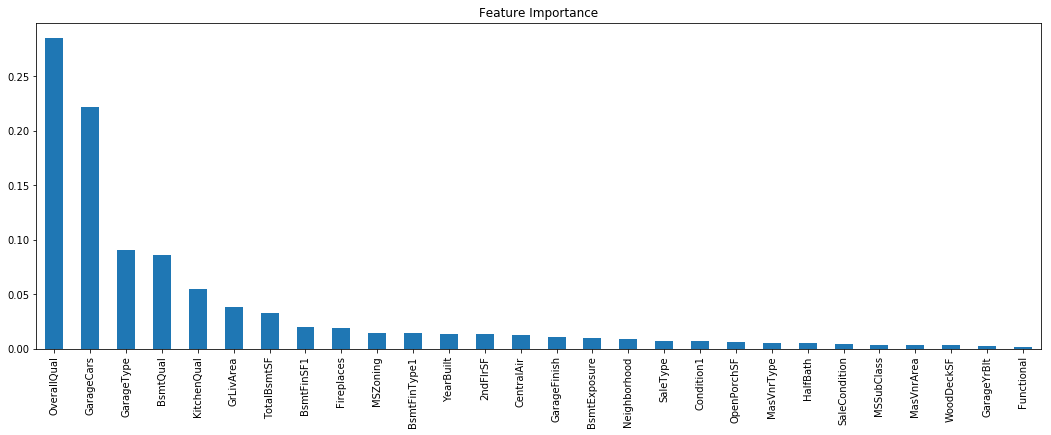

In [87]:
# Lets plot also the feature by their importance 
importance = pd.Series(np.abs(xgb_reg.feature_importances_))
importance.index = X_train.columns
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.title("Feature Importance")

## ANN

In [91]:
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers.normalization import BatchNormalization
from sklearn.preprocessing import StandardScaler

In [89]:
# We need Numpy Arrays in the that format
y_train_ss = y_train.values.reshape(-1,1)
X_train_ss = X_train.values

In [92]:
# The data need to be normalized for the ANN to work properly
sc_X = StandardScaler()
sc_y = StandardScaler()
X_train_ss = sc_X.fit_transform(X_train_ss)
y_train_ss = sc_y.fit_transform(y_train_ss)

In [93]:
# Take the dimension of the X in order to use it in the model creation
N, D = X_train_ss.shape

In [95]:
# I think this network should be deep and large enought for now. 
# I will include tank and relu expecting to be most suitable for the problem

i = Input(shape=(D,))
x = BatchNormalization()(i)
x = Dense(500, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(300, activation='tanh')(x)
x = BatchNormalization()(x)
x = Dense(100, activation='relu')(x)
x = BatchNormalization()(x)
x = Dense(1)(x)
model = Model(inputs=i, outputs=x)

In [96]:
model.compile(
  loss='mean_squared_error',
  optimizer='adam'
)

In [97]:
# Lets fit and see what we gonna get on the Train set. It would be better evaluate the performance on a separate Dev Set of course
r = model.fit(X_train_ss, y_train_ss, epochs=1000, batch_size=32)
print("Returned:", r)


Epoch 1/1000
1460/1460 [==============================] - 1s 979us/step - loss: 0.9497
Epoch 2/1000
1460/1460 [==============================] - 0s 153us/step - loss: 0.2975
Epoch 3/1000
1460/1460 [==============================] - 0s 155us/step - loss: 0.2306
Epoch 4/1000
1460/1460 [==============================] - 0s 171us/step - loss: 0.1771
Epoch 5/1000
1460/1460 [==============================] - 0s 163us/step - loss: 0.1611
Epoch 6/1000
1460/1460 [==============================] - 0s 172us/step - loss: 0.1705
Epoch 7/1000
1460/1460 [==============================] - 0s 166us/step - loss: 0.1368
Epoch 8/1000
1460/1460 [==============================] - 0s 152us/step - loss: 0.1435
Epoch 9/1000
1460/1460 [==============================] - 0s 161us/step - loss: 0.1130
Epoch 10/1000
1460/1460 [==============================] - 0s 155us/step - loss: 0.1416
Epoch 11/1000
1460/1460 [==============================] - 0s 158us/step - loss: 0.1164
Epoch 12/1000
1460/1460 [===============

1460/1460 [==============================] - 0s 151us/step - loss: 0.0748
Epoch 92/1000
1460/1460 [==============================] - 0s 171us/step - loss: 0.0789
Epoch 93/1000
1460/1460 [==============================] - 0s 195us/step - loss: 0.0683
Epoch 94/1000
1460/1460 [==============================] - 0s 214us/step - loss: 0.0796
Epoch 95/1000
1460/1460 [==============================] - 0s 208us/step - loss: 0.0564
Epoch 96/1000
1460/1460 [==============================] - 0s 177us/step - loss: 0.0691
Epoch 97/1000
1460/1460 [==============================] - 0s 246us/step - loss: 0.0628
Epoch 98/1000
1460/1460 [==============================] - 0s 210us/step - loss: 0.0495
Epoch 99/1000
1460/1460 [==============================] - 0s 223us/step - loss: 0.0450
Epoch 100/1000
1460/1460 [==============================] - 0s 182us/step - loss: 0.0586
Epoch 101/1000
1460/1460 [==============================] - 0s 179us/step - loss: 0.0679
Epoch 102/1000
1460/1460 [==================

1460/1460 [==============================] - 0s 143us/step - loss: 0.0724
Epoch 184/1000
1460/1460 [==============================] - 0s 187us/step - loss: 0.0673
Epoch 185/1000
1460/1460 [==============================] - 0s 160us/step - loss: 0.0444
Epoch 186/1000
1460/1460 [==============================] - 0s 181us/step - loss: 0.0448
Epoch 187/1000
1460/1460 [==============================] - 0s 149us/step - loss: 0.0490
Epoch 188/1000
1460/1460 [==============================] - 0s 152us/step - loss: 0.0616
Epoch 189/1000
1460/1460 [==============================] - 0s 168us/step - loss: 0.0482
Epoch 190/1000
1460/1460 [==============================] - 0s 155us/step - loss: 0.0649
Epoch 191/1000
1460/1460 [==============================] - 0s 135us/step - loss: 0.0550
Epoch 192/1000
1460/1460 [==============================] - 0s 170us/step - loss: 0.0642
Epoch 193/1000
1460/1460 [==============================] - 0s 144us/step - loss: 0.0575
Epoch 194/1000
1460/1460 [==========

1460/1460 [==============================] - 0s 134us/step - loss: 0.0417
Epoch 276/1000
1460/1460 [==============================] - 0s 136us/step - loss: 0.0598
Epoch 277/1000
1460/1460 [==============================] - 0s 159us/step - loss: 0.0459
Epoch 278/1000
1460/1460 [==============================] - 0s 180us/step - loss: 0.0557
Epoch 279/1000
1460/1460 [==============================] - 0s 164us/step - loss: 0.0418
Epoch 280/1000
1460/1460 [==============================] - 0s 143us/step - loss: 0.0531
Epoch 281/1000
1460/1460 [==============================] - 0s 130us/step - loss: 0.0351
Epoch 282/1000
1460/1460 [==============================] - 0s 136us/step - loss: 0.0436
Epoch 283/1000
1460/1460 [==============================] - 0s 137us/step - loss: 0.0538
Epoch 284/1000
1460/1460 [==============================] - 0s 130us/step - loss: 0.0648
Epoch 285/1000
1460/1460 [==============================] - 0s 147us/step - loss: 0.0544
Epoch 286/1000
1460/1460 [==========

1460/1460 [==============================] - 0s 132us/step - loss: 0.0439
Epoch 368/1000
1460/1460 [==============================] - 0s 143us/step - loss: 0.0417
Epoch 369/1000
1460/1460 [==============================] - 0s 129us/step - loss: 0.0487
Epoch 370/1000
1460/1460 [==============================] - 0s 145us/step - loss: 0.0380
Epoch 371/1000
1460/1460 [==============================] - 0s 139us/step - loss: 0.0508
Epoch 372/1000
1460/1460 [==============================] - 0s 129us/step - loss: 0.0363
Epoch 373/1000
1460/1460 [==============================] - 0s 130us/step - loss: 0.0477
Epoch 374/1000
1460/1460 [==============================] - 0s 135us/step - loss: 0.0504
Epoch 375/1000
1460/1460 [==============================] - 0s 144us/step - loss: 0.0502
Epoch 376/1000
1460/1460 [==============================] - 0s 128us/step - loss: 0.0463
Epoch 377/1000
1460/1460 [==============================] - 0s 147us/step - loss: 0.0470
Epoch 378/1000
1460/1460 [==========

1460/1460 [==============================] - 0s 131us/step - loss: 0.0525
Epoch 460/1000
1460/1460 [==============================] - 0s 162us/step - loss: 0.0398
Epoch 461/1000
1460/1460 [==============================] - 0s 141us/step - loss: 0.0528
Epoch 462/1000
1460/1460 [==============================] - 0s 136us/step - loss: 0.0504
Epoch 463/1000
1460/1460 [==============================] - 0s 137us/step - loss: 0.0396
Epoch 464/1000
1460/1460 [==============================] - 0s 136us/step - loss: 0.0607
Epoch 465/1000
1460/1460 [==============================] - 0s 139us/step - loss: 0.0430
Epoch 466/1000
1460/1460 [==============================] - 0s 139us/step - loss: 0.0440
Epoch 467/1000
1460/1460 [==============================] - 0s 134us/step - loss: 0.0419
Epoch 468/1000
1460/1460 [==============================] - 0s 141us/step - loss: 0.0402
Epoch 469/1000
1460/1460 [==============================] - 0s 133us/step - loss: 0.0440
Epoch 470/1000
1460/1460 [==========

1460/1460 [==============================] - 0s 130us/step - loss: 0.0310
Epoch 552/1000
1460/1460 [==============================] - 0s 141us/step - loss: 0.0408
Epoch 553/1000
1460/1460 [==============================] - 0s 143us/step - loss: 0.0406
Epoch 554/1000
1460/1460 [==============================] - 0s 123us/step - loss: 0.0365
Epoch 555/1000
1460/1460 [==============================] - 0s 135us/step - loss: 0.0406
Epoch 556/1000
1460/1460 [==============================] - 0s 134us/step - loss: 0.0499
Epoch 557/1000
1460/1460 [==============================] - 0s 136us/step - loss: 0.0429
Epoch 558/1000
1460/1460 [==============================] - 0s 145us/step - loss: 0.0398
Epoch 559/1000
1460/1460 [==============================] - 0s 131us/step - loss: 0.0427
Epoch 560/1000
1460/1460 [==============================] - 0s 139us/step - loss: 0.0531
Epoch 561/1000
1460/1460 [==============================] - 0s 132us/step - loss: 0.0310
Epoch 562/1000
1460/1460 [==========

1460/1460 [==============================] - 0s 131us/step - loss: 0.0358
Epoch 644/1000
1460/1460 [==============================] - 0s 138us/step - loss: 0.0439
Epoch 645/1000
1460/1460 [==============================] - 0s 137us/step - loss: 0.0427
Epoch 646/1000
1460/1460 [==============================] - 0s 139us/step - loss: 0.0445
Epoch 647/1000
1460/1460 [==============================] - 0s 133us/step - loss: 0.0375
Epoch 648/1000
1460/1460 [==============================] - 0s 132us/step - loss: 0.0376
Epoch 649/1000
1460/1460 [==============================] - 0s 146us/step - loss: 0.0425
Epoch 650/1000
1460/1460 [==============================] - 0s 127us/step - loss: 0.0454
Epoch 651/1000
1460/1460 [==============================] - 0s 137us/step - loss: 0.0403
Epoch 652/1000
1460/1460 [==============================] - 0s 132us/step - loss: 0.0533
Epoch 653/1000
1460/1460 [==============================] - 0s 147us/step - loss: 0.0588
Epoch 654/1000
1460/1460 [==========

1460/1460 [==============================] - 0s 128us/step - loss: 0.0421
Epoch 736/1000
1460/1460 [==============================] - 0s 157us/step - loss: 0.0327
Epoch 737/1000
1460/1460 [==============================] - 0s 127us/step - loss: 0.0337
Epoch 738/1000
1460/1460 [==============================] - 0s 142us/step - loss: 0.0369
Epoch 739/1000
1460/1460 [==============================] - 0s 138us/step - loss: 0.0377
Epoch 740/1000
1460/1460 [==============================] - 0s 134us/step - loss: 0.0354
Epoch 741/1000
1460/1460 [==============================] - 0s 145us/step - loss: 0.0378
Epoch 742/1000
1460/1460 [==============================] - 0s 132us/step - loss: 0.0381
Epoch 743/1000
1460/1460 [==============================] - 0s 137us/step - loss: 0.0437
Epoch 744/1000
1460/1460 [==============================] - 0s 126us/step - loss: 0.0390
Epoch 745/1000
1460/1460 [==============================] - 0s 135us/step - loss: 0.0348
Epoch 746/1000
1460/1460 [==========

Epoch 827/1000
1460/1460 [==============================] - 0s 129us/step - loss: 0.0511
Epoch 828/1000
1460/1460 [==============================] - 0s 133us/step - loss: 0.0329
Epoch 829/1000
1460/1460 [==============================] - 0s 141us/step - loss: 0.0388
Epoch 830/1000
1460/1460 [==============================] - 0s 135us/step - loss: 0.0293
Epoch 831/1000
1460/1460 [==============================] - 0s 139us/step - loss: 0.0383
Epoch 832/1000
1460/1460 [==============================] - 0s 142us/step - loss: 0.0381
Epoch 833/1000
1460/1460 [==============================] - 0s 134us/step - loss: 0.0437
Epoch 834/1000
1460/1460 [==============================] - 0s 138us/step - loss: 0.0344
Epoch 835/1000
1460/1460 [==============================] - 0s 139us/step - loss: 0.0394
Epoch 836/1000
1460/1460 [==============================] - 0s 143us/step - loss: 0.0414
Epoch 837/1000
1460/1460 [==============================] - 0s 129us/step - loss: 0.0373
Epoch 838/1000
1460/1

1460/1460 [==============================] - 0s 128us/step - loss: 0.0492
Epoch 920/1000
1460/1460 [==============================] - 0s 140us/step - loss: 0.0368
Epoch 921/1000
1460/1460 [==============================] - 0s 133us/step - loss: 0.0256
Epoch 922/1000
1460/1460 [==============================] - 0s 137us/step - loss: 0.0352
Epoch 923/1000
1460/1460 [==============================] - 0s 132us/step - loss: 0.0479
Epoch 924/1000
1460/1460 [==============================] - 0s 143us/step - loss: 0.0457
Epoch 925/1000
1460/1460 [==============================] - 0s 139us/step - loss: 0.0356
Epoch 926/1000
1460/1460 [==============================] - 0s 138us/step - loss: 0.0377
Epoch 927/1000
1460/1460 [==============================] - 0s 133us/step - loss: 0.0453
Epoch 928/1000
1460/1460 [==============================] - 0s 142us/step - loss: 0.0333
Epoch 929/1000
1460/1460 [==============================] - 0s 137us/step - loss: 0.0322
Epoch 930/1000
1460/1460 [==========

### Make Predictions

In [117]:
# We remember there were some missing values in the test set in features that were not trained upon in the train set
# Lets check if there are any in the final feature set
X_test.isnull().sum()

MasVnrArea       0
GarageYrBlt      0
Condition1       0
MSSubClass       0
Functional       2
OpenPorchSF      0
SaleCondition    0
WoodDeckSF       0
SaleType         1
2ndFlrSF         0
Neighborhood     0
MasVnrType       0
YearBuilt        0
BsmtExposure     0
HalfBath         0
Fireplaces       0
BsmtFinType1     0
MSZoning         4
BsmtFinSF1       0
CentralAir       0
TotalBsmtSF      0
GarageFinish     0
GrLivArea        0
KitchenQual      1
GarageType       0
BsmtQual         0
GarageCars       0
OverallQual      0
dtype: int64

In [118]:
# We need to fill this values before putting the X_test into the model
imp_median = SimpleImputer(strategy='median')
X_test = imp_median.fit_transform(X_test)
imp_median.get_params

<bound method BaseEstimator.get_params of SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)>

In [123]:
# Get the predictions - we need to inverse transform the predictions
predictions_rnn = model.predict(sc_X.transform(X_test))
predictions_rnn = sc_y.inverse_transform(predictions_rnn)

In [124]:
# Lets compare the results of the XGB and the ANN
y_test_ann = pd.DataFrame(predictions_rnn, columns=['ANN'])
predictions_xgb_ann = pd.concat((submission, y_test_ann), axis=1)

In [125]:
# Lets see how the two models compare
predictions_xgb_ann['D_XGB_ANN'] = predictions_xgb_ann['SalePrice'] - predictions_xgb_ann['ANN']
predictions_xgb_ann.D_XGB_ANN.describe()

count      1459.000000
mean       2252.806885
std       21781.914062
min     -106776.421875
25%       -9109.808594
50%        -959.328125
75%        9313.796875
max      142701.156250
Name: D_XGB_ANN, dtype: float64

 -> There seem to be a significant difference in the result. Especially the min and max values are paticularly [large]. The STD seams also to high. A further investigation would be necessary. I will skip this not to extend the notebook to much

In [141]:
# I need to reshape the predictions in order to submit the predictions
predictions_rnn = predictions_rnn.reshape(-1)
np.shape(predictions_rnn)

(1459,)

In [142]:
submission_ann = pd.DataFrame({"Id":test_id, "SalePrice": predictions_rnn})

In [143]:
submission_ann.to_csv("submission_ann_v2.csv", index=False)

In [144]:
# Save the model
dump(model, 'ANN_v2.joblib') 

['ANN_v2.joblib']

# Final Results

The results from the first atempt placed me around the middle of the Leaderboard. 
I think thats not too bad, having in mind I played fair. Here are the final reluts:

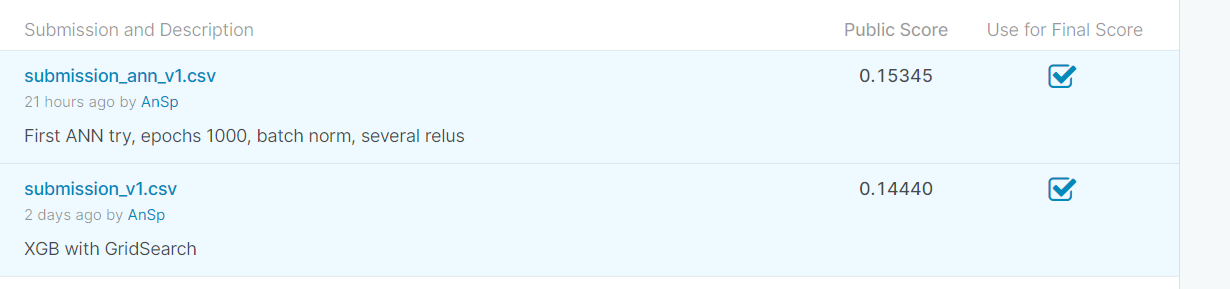

In [145]:
from IPython.display import Image
Image("Results.PNG")